It is the kernel that I have tried and compiled from the courses of [İbrahim Cebeci](https://www.udemy.com/user/ibrahim-cebeci-2/) (Language of the courses is Turkish: [Doğal Dil İşleme A-Z™: (NLP)](https://www.udemy.com/course/dogal-dil-isleme/)), which is has more than 6 courses on Udemy.

# Content


#### [1.StopWords - Stemmer - Count Vectorizer](#1.)
#### [2.Reg.Exp.- Lemmatization - Bag of Words](#2.)
#### [3.NLTK - Word2Vec(SkipGram,CBOW) - Glove](#3.)

![](https://iili.io/JGUWve.png)


<a id="1."></a> 
# 1.StopWords - Stemmer - Count Vectorizer

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import nltk

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

yorumlar = pd.read_csv('../input/restaurant-reviews/Restaurant_Reviews.csv')
yorumlar.head()

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Regular Expression
### SparceMatrix-StopWords-Stemmer

In [2]:
#import re #regular expression
#Preprocessing (Önişleme) -- SparceMatrix-StopWords-Stemmer
derlem = []
for i in range(len(yorumlar)):
    yorum = re.sub('[^a-zA-Z]',' ',yorumlar['Review'][i])
    yorum = yorum.lower()
    yorum = yorum.split()
    yorum = [ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words('english'))] #stopwords.words('turkish')
    yorum = ' '.join(yorum) #vektor için list değil string hali gerekli
    derlem.append(yorum)
    
derlem[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

## CountVectorizer
### Bag of Words (BOW)

In [3]:
#Feautre Extraction ( Öznitelik Çıkarımı) -- CountVectorizer
#Bag of Words (BOW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000) #kelımelerden en cok kullanılan kac tane alınsın 
X = cv.fit_transform(derlem).toarray() # bağımsız değişken
y = yorumlar.iloc[:,1].values # bağımlı değişken
print(X[0:5])
print(y[0:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 0 1 1]


Text(0.5,1,'Liked')

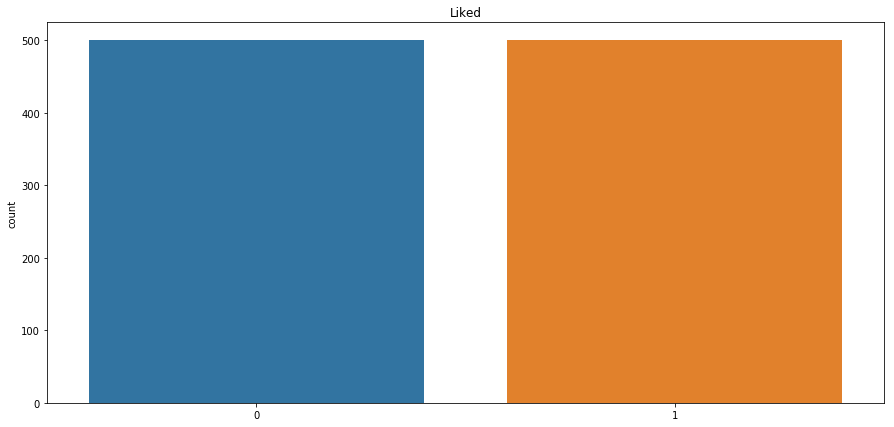

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(y)
plt.title("Liked")

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


score:  0.725


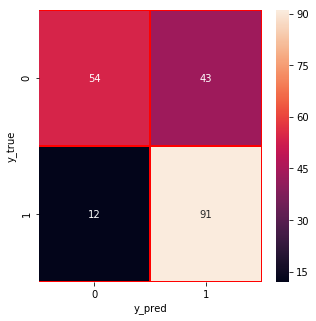

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
#print(cm)
print("score: ",gnb.score(X_test,y_test))

# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a id="2."></a> 
# 2.Reg.Exp.- Lemmatization - Bag of Words

In [6]:
import pandas as pd
import re
import nltk # natural language tool kit
nltk.download("stopwords")      # corpus diye bir kalsore indiriliyor
from nltk.corpus import stopwords  # sonra ben corpus klasorunden import ediyorum

import nltk as nlp
lemma = nlp.WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# %% import twitter data
data = pd.read_csv(r"../input/twitter-user-gender-classification/gender-classifier-DFE-791531.csv",encoding = "latin1")
data.head()

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [7]:
data = pd.concat([data.gender,data.description],axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 2 columns):
gender         19953 non-null object
description    16306 non-null object
dtypes: object(2)
memory usage: 313.4+ KB
None


In [8]:
data.dropna(axis = 0,inplace = True)
data.gender = [1 if each == "female" else 0 for each in data.gender]
print(data.head())
print(data.info())

   gender                                        description
0       0                              i sing my own rhythm.
1       0  I'm the author of novels filled with family dr...
2       0                louis whining and squealing and all
3       0  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4       1  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 20049
Data columns (total 2 columns):
gender         16224 non-null int64
description    16224 non-null object
dtypes: int64(1), object(1)
memory usage: 380.2+ KB
None


## Clening data 

In [9]:
#%% clening data 
description_list = []
for description in data.description:
    # regular expression RE mesela "[^a-zA-Z]"
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    # description = description.split()
    # split yerine tokenizer kullanabiliriz
    # split kullanırsak "shouldn't " gibi kelimeler "should" ve "not" diye ikiye ayrılmaz ama word_tokenize() kullanirsak ayrilir
    description = nltk.word_tokenize(description)
    # stopwords (irrelavent words) gereksiz kelimeler
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    # lemmatazation loved => love   gitmeyecegim = > git
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description] #[ ps.stem(word) for word in description]
    description = " ".join(description)  #vektor için list değil string hali gerekli
    description_list.append(description)
description_list[0:5]

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx']

## Bag of Words

In [10]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin kullandigim metot
max_features = 5000 #kelımelerden en cok kullanılan kac tane alınsın

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x bağımsız değişken
print("en sik kullanilan {} kelimeden bazıları: {}".format(max_features,count_vectorizer.get_feature_names()[0:5]))

y = data.iloc[:,0].values   # male or female classes
x = sparce_matrix

en sik kullanilan 5000 kelimeden bazıları: ['aa', 'aaron', 'ab', 'abacus', 'abc']


Text(0.5,1,'male or female classes')

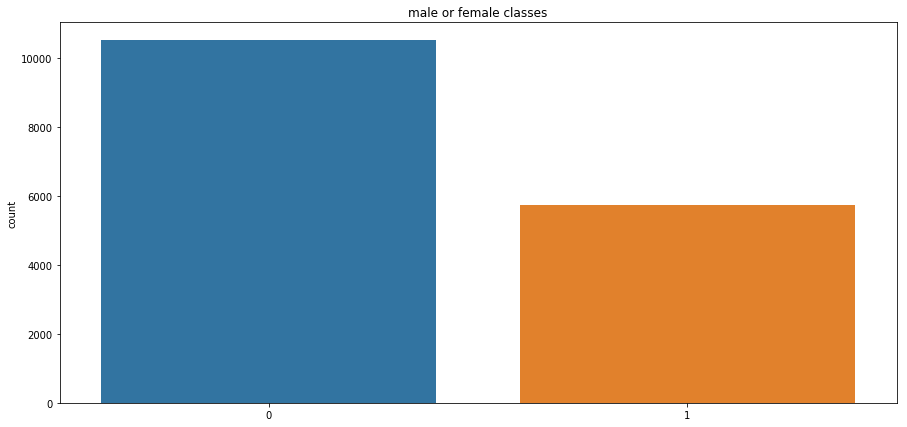

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(y)
plt.title("male or female classes")

## Train-Test Split

accuracy:  0.4622496147919877


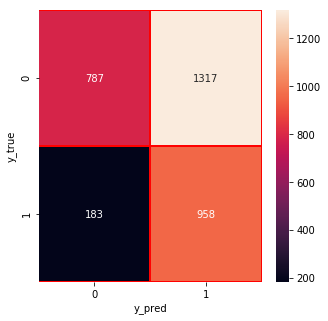

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# %% naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#%% prediction
y_pred = nb.predict(x_test)

print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a id="3."></a> 
# 3.NLTK - Word2Vec(SkipGram,CBOW) - Glove

## NLTK-Tokenize

In [13]:
# NLTK-Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
text = "Alan Mathison Turing was an English computer scientist, mathematician, logician, cryptanalyst, philosopher, and theoretical biologist. Turing was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general purpose computer. Turing is widely considered to be the father of theoretical computer science and artificial intelligence."

In [14]:
text.split()[0:10]

['Alan',
 'Mathison',
 'Turing',
 'was',
 'an',
 'English',
 'computer',
 'scientist,',
 'mathematician,',
 'logician,']

In [15]:
word_tokenize(text)[0:10] #kelıme tokenlestırme

['Alan',
 'Mathison',
 'Turing',
 'was',
 'an',
 'English',
 'computer',
 'scientist',
 ',',
 'mathematician']

In [16]:
sent_tokenize(text)[0:10] #cumle tokenlestırme

['Alan Mathison Turing was an English computer scientist, mathematician, logician, cryptanalyst, philosopher, and theoretical biologist.',
 'Turing was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general purpose computer.',
 'Turing is widely considered to be the father of theoretical computer science and artificial intelligence.']

## NLTK-StopWords

In [17]:
# NLTK-StopWords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = 'Fazıl Say is a Turkish pianist and composer who was born in Ankara, described recently as "not merely a pianist of genius; but undoubtedly he will be one of the great artists of the twenty-first century".'

stopwords = stopwords.words('english')
print(stopwords[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [18]:
words = word_tokenize(text)
filtered_words = []
for word in words:
    if word not in stopwords:
        filtered_words.append(word)
        
filtered_words[0:10]

['Fazıl',
 'Say',
 'Turkish',
 'pianist',
 'composer',
 'born',
 'Ankara',
 ',',
 'described',
 'recently']

## NLTK-Stemmer

In [19]:
# NLTK-Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

words = ['drive', 'driving', 'driver', 'drives', 'drove', 'cats', 'children']
#words = ['Boyunluk', 'Boynu', 'Boylar', 'Boyun', 'Boy']

for w in words:
    print(ps.stem(w))
    
#kelimenin sonundaki ekler kesiliyor

drive
drive
driver
drive
drove
cat
children


## NLTK-Part of Speech Tagging

In [20]:
# NLTK-Part of Speech Tagging
import nltk

text = 'Friedrich Wilhelm Nietzsche was a German philosopher, cultural critic, composer, poet, philologist, and a Latin and Greek scholar whose work has exerted a profound influence on Western philosophy and modern intellectual history. He began his career as a classical philologist before turning to philosophy. He became the youngest ever to hold the Chair of Classical Philology at the University of Basel in 1869 at the age of 24. Nietzsche resigned in 1879 due to health problems that plagued him most of his life; he completed much of his core writing in the following decade. In 1889 at age 44, he suffered a collapse and afterward, a complete loss of his mental faculties. He lived his remaining years in the care of his mother until her death in 1897 and then with his sister Elisabeth Förster-Nietzsche. Nietzsche died in 1900.'
tokenized = nltk.word_tokenize(text)
tokenized[0:10]

['Friedrich',
 'Wilhelm',
 'Nietzsche',
 'was',
 'a',
 'German',
 'philosopher',
 ',',
 'cultural',
 'critic']

In [21]:
"""
CC     coordinating conjunction
CD     cardinal digit
DT     determiner
EX     existential there (like: "there is" ... think of it like "there exists")
FW     foreign word
IN     preposition/subordinating conjunction
JJ     adjective 'big'
JJR    adjective, comparative 'bigger'
JJS    adjective, superlative 'biggest'
LS     list marker 1)
MD     modal could, will
NN     noun, singular 'desk'
NNS    noun plural 'desks'
NNP    proper noun, singular 'Harrison'
NNPS   proper noun, plural 'Americans'
PDT    predeterminer 'all the kids'
POS    possessive ending parent's
PRP    personal pronoun I, he, she
PRP$   possessive pronoun my, his, hers
RB     adverb very, silently,
RBR    adverb, comparative better
RBS    adverb, superlative best
RP     particle give up
TO     to go 'to' the store.
UH     interjection errrrrrrrm
VB     verb, base form take
VBD    verb, past tense took
VBG    verb, gerund/present participle taking
VBN    verb, past participle taken
VBP    verb, sing. present, non-3d take
VBZ    verb, 3rd person sing. present takes
WDT    wh-determiner which
WP     wh-pronoun who, what
WP$    possessive wh-pronoun whose
WRB    wh-abverb where, when
"""

'\nCC     coordinating conjunction\nCD     cardinal digit\nDT     determiner\nEX     existential there (like: "there is" ... think of it like "there exists")\nFW     foreign word\nIN     preposition/subordinating conjunction\nJJ     adjective \'big\'\nJJR    adjective, comparative \'bigger\'\nJJS    adjective, superlative \'biggest\'\nLS     list marker 1)\nMD     modal could, will\nNN     noun, singular \'desk\'\nNNS    noun plural \'desks\'\nNNP    proper noun, singular \'Harrison\'\nNNPS   proper noun, plural \'Americans\'\nPDT    predeterminer \'all the kids\'\nPOS    possessive ending parent\'s\nPRP    personal pronoun I, he, she\nPRP$   possessive pronoun my, his, hers\nRB     adverb very, silently,\nRBR    adverb, comparative better\nRBS    adverb, superlative best\nRP     particle give up\nTO     to go \'to\' the store.\nUH     interjection errrrrrrrm\nVB     verb, base form take\nVBD    verb, past tense took\nVBG    verb, gerund/present participle taking\nVBN    verb, past par

In [22]:
nltk.pos_tag(tokenized)[0:10]

[('Friedrich', 'NNP'),
 ('Wilhelm', 'NNP'),
 ('Nietzsche', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('German', 'JJ'),
 ('philosopher', 'NN'),
 (',', ','),
 ('cultural', 'JJ'),
 ('critic', 'NN')]

## NLTK-named entitiy recognition

In [23]:
# NLTK-named entitiy recognition

import nltk
text = "Steve Jobs was an American entrepreneur and business magnate. He was the chairman, chief executive officer (CEO), and a co-founder of Apple Inc., chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the microcomputer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak. "
tokenized = nltk.word_tokenize(text)
print(tokenized[0:10])

['Steve', 'Jobs', 'was', 'an', 'American', 'entrepreneur', 'and', 'business', 'magnate', '.']


In [24]:
tagged = nltk.pos_tag(tokenized)
print(tagged[0:10])

[('Steve', 'NNP'), ('Jobs', 'NNP'), ('was', 'VBD'), ('an', 'DT'), ('American', 'JJ'), ('entrepreneur', 'NN'), ('and', 'CC'), ('business', 'NN'), ('magnate', 'NN'), ('.', '.')]


In [25]:
named_ent = nltk.ne_chunk(tagged)
print(named_ent[0:10])
#named_ent.draw()

[Tree('PERSON', [('Steve', 'NNP')]), Tree('PERSON', [('Jobs', 'NNP')]), ('was', 'VBD'), ('an', 'DT'), Tree('GPE', [('American', 'JJ')]), ('entrepreneur', 'NN'), ('and', 'CC'), ('business', 'NN'), ('magnate', 'NN'), ('.', '.')]


In [26]:
"""
NE Türü         	Örnek
ORGANIZATION    	Georgia-Pacific Corp., WHO
PERSON          	Eddy Bonte, President Obama
LOCATION        	Murray River, Mount Everest
DATE            	June, 2008-06-29
TIME            	two fifty a m, 1:30 p.m.
MONEY           	175 million Canadian Dollars, GBP 10.40
PERCENT         	twenty pct, 18.75 %
FACILITY        	Washington Monument, Stonehenge
GPE             	South East Asia, Midlothian
"""

'\nNE Türü         \tÖrnek\nORGANIZATION    \tGeorgia-Pacific Corp., WHO\nPERSON          \tEddy Bonte, President Obama\nLOCATION        \tMurray River, Mount Everest\nDATE            \tJune, 2008-06-29\nTIME            \ttwo fifty a m, 1:30 p.m.\nMONEY           \t175 million Canadian Dollars, GBP 10.40\nPERCENT         \ttwenty pct, 18.75 %\nFACILITY        \tWashington Monument, Stonehenge\nGPE             \tSouth East Asia, Midlothian\n'

## NLTK-Lemmatizing

In [27]:
# NLTK-Lemmatizing
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

words = ['drive', 'driving', 'driver', 'drives', 'drove', 'cats', 'children']
for w in words:
    print(lem.lemmatize(w))
#kelimenin sözlükteki köküne iniliyor (morfolojik)

print(lem.lemmatize('drove', 'v'))

drive
driving
driver
drive
drove
cat
child
drive


## Word2Vec

In [28]:
#Word2Vec
import numpy as np
#numpy vektor ve matrısler uzerıne ıslem yapmamızı sağlar
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Word2Vec corpus üzerinde tüm kelimelerin üzerinden geç
# her kelimenin etrafındaki kelimeleri tahmin et
# iki kelime birbirne ne kadar sık bulunuyorsa vektöre yansıt
f = open('../input/hurriyet/hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [29]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1) #genelde size 5-300 uzunlugunda vektor olustururuz #gozetımsız ogrenme yontemı
#size 100 uzunlugunda vektor
#window sol ve sagda bakılacak kelıme sayısı
#sg 1 ise skip-gram kullanılacak, default olarak cbow kullanılıyor.
#mın_count kelıme en az kac kere gecıyorsa al 
model.wv['ankara']
# wv word vektorun kısaltılmısı
#kelime vektörü, word vector, word embedding, embedding hep aynı şeyi ifade ediyor

array([ 0.43778765, -0.90223444,  0.37828615,  0.10035159, -0.0760783 ,
       -0.1367065 , -0.22206822,  0.10576011,  0.26512158,  0.28685355,
       -0.21809924, -0.30248895,  0.44299066,  0.91831857, -0.45399898,
       -0.11750132,  0.11100883,  0.8305459 ,  0.7290407 , -0.09896986,
       -0.20636629, -0.12795049,  0.47952697, -0.22489874,  0.01970391,
        0.46261978,  0.15668304, -0.4951677 ,  0.19398053, -0.2948776 ,
       -0.1102379 ,  0.53846043,  0.10821059,  0.19447304, -0.00231502,
       -0.16358587,  0.2844942 ,  0.06057941, -0.26662976, -0.3609207 ,
       -0.04301647, -0.0772246 , -0.35759014,  0.8005127 , -0.01989518,
       -0.38912252, -0.27666435,  0.02099366, -0.47167778,  0.01313333,
        0.16988844,  0.28194985,  0.28203046, -0.3122912 ,  0.3058704 ,
        0.12820148,  0.2480082 , -0.2473095 ,  0.39929628,  0.02512074,
        0.14117038,  0.34247252,  0.06970467, -0.4736123 ,  0.47237128,
       -0.5313134 , -0.28636715,  0.17363705, -0.02066661, -0.73

In [30]:
print(model.wv.most_similar('almanya'))
#yazdıgınız kelıme kelıme haznesınde yoksa hata alırsınız.

[('avusturya', 0.8305239081382751), ('hollanda', 0.7620744109153748), ('fransa', 0.7554739713668823), ('danimarka', 0.7339168787002563), ('bavyera', 0.7321945428848267), ('berlin', 0.681398868560791), ('maiziere', 0.6799507141113281), ('saksonya', 0.6791752576828003), ('maizière', 0.6705039739608765), ('belçika', 0.6691569685935974)]


/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [31]:
#model.save('word2vec.model')
#model = Word2Vec.load('word2vec.model')

In [32]:
def closestwords_tsneplot(model, word):
    '''
     bu sınıf verılen modelı ıle kelımeyı alır
     kelımeye en yakın kelımelerın vektorlerını bır dızıye atarız
     TSNE ıle bu vektorlerı grafıge donustururuz
    '''
    word_vectors = np.empty((0,100)) # en yakın olanları lısteyi hazırladık
    word_labels = [word] #kelımeyı dızı halıne getırdık
    
    close_words = model.wv.most_similar(word) #yakın olan kelımeler bulundu
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0) #gelen kelımenın vektoru eklendı
    
    for w, _ in close_words: #w kelimenın kendısı dıgerı ıse yakınlık oranı
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0) #yakın kelımelerın vektorlerı de eklendı
        #boylece  gelen kelıme ve yakın kelımeler word_labels, bunların vektorlerı ise word_vectors akta
        
    tsne = TSNE(random_state=0) #kelımeleı grafıge doken kutuphane
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

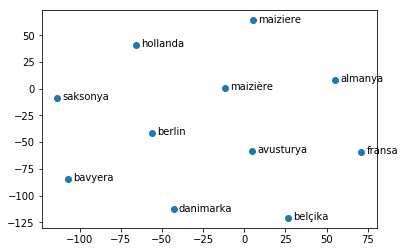

In [33]:
closestwords_tsneplot(model, 'almanya')

## Glove

In [34]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [35]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors # global vectors for word representations (Glove 2014)
'''
glove_input =  read_data('../input/glove6b100dtxt/glove.6B.100d.txt')
word2vec_output =  read_data('../input/glove-vec/glove.6B.100d.word2vec') #word2vec yazıyor ama glove kullanılacak word2vec yazmasının amacı gensım yuklemeyı kolaylastırma
glove2word2vec(glove_input, word2vec_output)


model = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)
model['istanbul']
model.most_similar('ankara') #bu yontem word2vec vardı ama glove 6 mılyar kelıme ıcınde daha basarılı
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=2)
#topn demek sadece n tane goster
model.most_similar(positive=['berlin', 'turkey'], negative=['ankara'], topn=1)
model.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)


'''


"\nglove_input =  read_data('../input/glove6b100dtxt/glove.6B.100d.txt')\nword2vec_output =  read_data('../input/glove-vec/glove.6B.100d.word2vec') #word2vec yazıyor ama glove kullanılacak word2vec yazmasının amacı gensım yuklemeyı kolaylastırma\nglove2word2vec(glove_input, word2vec_output)\n\n\nmodel = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)\nmodel['istanbul']\nmodel.most_similar('ankara') #bu yontem word2vec vardı ama glove 6 mılyar kelıme ıcınde daha basarılı\nmodel.most_similar(positive=['woman', 'king'], negative=['man'], topn=2)\n#topn demek sadece n tane goster\nmodel.most_similar(positive=['berlin', 'turkey'], negative=['ankara'], topn=1)\nmodel.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)\n\n\n"